## Rolling Retention Method

+ Rolling Retention Rate calculates the percentage of customers who are still active after a specific period (e.g., 30 days, 60 days, or 90 days) since they were first acquired.
+ This metric is particularly useful for understanding the longevity of customer engagement in a continuously rolling time frame.
+ It helps measure customer stickiness and the effectiveness of your retention strategies.

Rolling Retention Rate (N days)=(Number of Customers Acquired N Days Ago / Number of Customers who are Active on Day N)×100

+ Number of Customers Acquired N Days Ago: The count of customers acquired exactly N days before the current day.
+ Number of Customers who are Active on Day N: The count of customers who were acquired N days ago and are still active on the current day.

**Implement Rolling Retention Rate in Python:**

To calculate the rolling retention rate, we need to:

+ Identify the acquisition date of each customer.
+ Determine the number of customers acquired N days ago.
+ Identify the number of customers still active on day N.

In [1]:
import pandas as pd
import numpy as np

**LOAD THE DATA**

In [2]:
# Load the data
data = pd.read_csv('e_commerce_no_missing_values.csv')

In [23]:
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Sort data by 'CustomerID' and 'InvoiceDate'
data = data.sort_values(['CustomerID', 'InvoiceDate'])

# Identify the first purchase date for each customer
data['FirstPurchaseDate'] = data.groupby('CustomerID')['InvoiceDate'].transform('min')\

# Calculate the number of days since the first purchase for each transaction
data['DaysSinceFirstPurchase'] = (data['InvoiceDate'] - data['FirstPurchaseDate']).dt.days

In [24]:
# Set the rolling retention period (e.g., 30 days)
retention_days = 30
# Calculate the number of customers acquired exactly 'retention_days' ago
customers_acquired_ndays_ago = data[data['DaysSinceFirstPurchase'] == retention_days]['CustomerID'].nunique()
# Calculate the number of customers who are active at 'retention_days' (still making purchases)
customers_active_ndays = data[data['DaysSinceFirstPurchase'] >= retention_days]['CustomerID'].nunique()

In [25]:
# Calculate the Rolling Retention Rate
if customers_acquired_ndays_ago > 0:  # To prevent division by zero
    rolling_retention_rate = (customers_active_ndays / customers_acquired_ndays_ago) * 100
else:
    rolling_retention_rate = 0  # No customers acquired exactly N days ago

print(f"Rolling Retention Rate ({retention_days} days): {rolling_retention_rate:.2f}%")

Rolling Retention Rate (30 days): 7801.92%


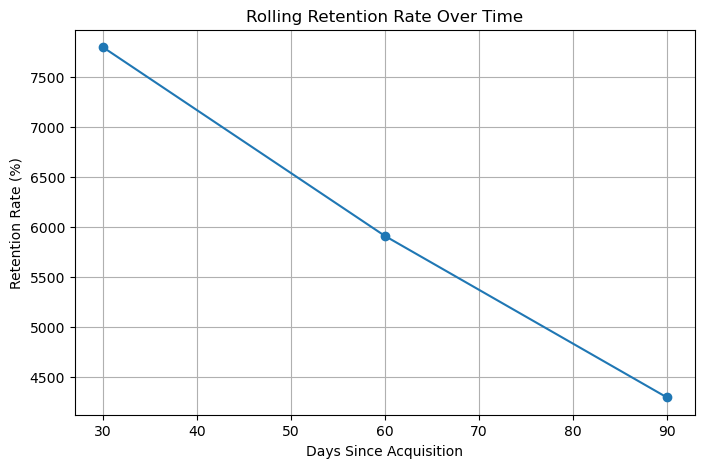

In [26]:
import matplotlib.pyplot as plt

# Define retention periods to analyze
retention_periods = [30, 60, 90]

retention_rates = []

for days in retention_periods:
    # Calculate customers acquired exactly 'days' ago
    acquired_customers = data[data['DaysSinceFirstPurchase'] == days]['CustomerID'].nunique()
    active_customers = data[data['DaysSinceFirstPurchase'] >= days]['CustomerID'].nunique()
    
    if acquired_customers > 0:
        rate = (active_customers / acquired_customers) * 100
    else:
        rate = 0
    
    retention_rates.append(rate)

# Plot the retention rates
plt.figure(figsize=(8, 5))
plt.plot(retention_periods, retention_rates, marker='o')
plt.title('Rolling Retention Rate Over Time')
plt.xlabel('Days Since Acquisition')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.show()

**Insights from Rolling Retention Rate:**
+ Customer Stickiness: Understand how well customers are retained over different periods (30, 60, 90 days).
+ Identify Drop-off Points: Determine when most customers tend to leave (e.g., if retention drops sharply after 30 days).
+ Improve Retention Strategies: Use insights to improve customer engagement and retention strategies for critical periods (like the first 30 or 60 days).